<a href="https://colab.research.google.com/github/AkhilaGuptaP/ML_Capstone/blob/main/Draft5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To filter and suppress warning messages issued by code. The purpose is to prevent warning messages from cluttering the console or logs.
import warnings
warnings.filterwarnings('ignore')


# Tells to render Matplotlib plots as static images directly within the notebook itself
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold,train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import recall_score,precision_score,accuracy_score,roc_curve,roc_auc_score,f1_score,log_loss
from sklearn.metrics import classification_report,confusion_matrix,make_scorer
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

import time

### Dataset Loading

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

# Load Dataset
Insurance_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Module6(ML)/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION (1).csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [ ]:
# Dataset First Look
Insurance_df.head(10).T

0         1          2         3         4  \
id                            1         2          3         4         5   
Gender                     Male      Male       Male      Male    Female   
Age                          44        76         47        21        29   
Driving_License               1         1          1         1         1   
Region_Code                28.0       3.0       28.0      11.0      41.0   
Previously_Insured            0         0          0         1         1   
Vehicle_Age           > 2 Years  1-2 Year  > 2 Years  < 1 Year  < 1 Year   
Vehicle_Damage              Yes        No        Yes        No        No   
Annual_Premium          40454.0   33536.0    38294.0   28619.0   27496.0   
Policy_Sales_Channel       26.0      26.0       26.0     152.0     152.0   
Vintage                     217       183         27       203        39   
Response                      1         0          1         0         0   

                             5         6         7         8         9  
id                           6         7         8         9        10  
Gender                  Female      Male    Female    Female    Female  
Age                         24        23        56        24        32  
Driving_License              1         1         1         1         1  
Region_Code               33.0      11.0      28.0       3.0       6.0  
Previously_Insured           0         0         0         1         1  
Vehicle_Age           < 1 Year  < 1 Year  1-2 Year  < 1 Year  < 1 Year  
Vehicle_Damage             Yes       Yes       Yes        No        No  
Annual_Premium          2630.0   23367.0   32031.0   27619.0   28771.0  
Policy_Sales_Channel     160.0     152.0      26.0     152.0     152.0  
Vintage                    176       249        72        28        80  
Response                     0         0         1         0         0

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f'Original dataset has {Insurance_df.shape[0]} Row & {Insurance_df.shape[1]} Columns.')

Original dataset has 381109 Row & 12 Columns.


### Dataset Information

In [ ]:
# Dataset Info
Insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_count=Insurance_df.duplicated().sum()
print("Dataset's duplicate value count is ",duplicate_count)

Dataset's duplicate value count is  0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_values=Insurance_df.isna().sum()
missing_values

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Our dataset doesnot have any missing values or duplicate values.

### What did you know about your dataset?

This dataset holds the demographical information like Person's Gender and age ,region code they belong to.Along with these we were also provided with information whether they have a driving license or not.

Previously_insured column tells us whether they already have vehicle insurance from other company.

We have important Vehicle information of customer's like Vehicle age, vehicle Damage.

Additionally policy information like Annual premium etc and response which states whether customer is interested in taking vehicle insurance are available.



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
list(Insurance_df.columns)

['id',
 'Gender',
 'Age',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Vehicle_Age',
 'Vehicle_Damage',
 'Annual_Premium',
 'Policy_Sales_Channel',
 'Vintage',
 'Response']

In [ ]:
# Dataset Describe
Insurance_df.describe()

id            Age  Driving_License    Region_Code  \
count  381109.000000  381109.000000    381109.000000  381109.000000   
mean   190555.000000      38.822584         0.997869      26.388807   
std    110016.836208      15.511611         0.046110      13.229888   
min         1.000000      20.000000         0.000000       0.000000   
25%     95278.000000      25.000000         1.000000      15.000000   
50%    190555.000000      36.000000         1.000000      28.000000   
75%    285832.000000      49.000000         1.000000      35.000000   
max    381109.000000      85.000000         1.000000      52.000000   

       Previously_Insured  Annual_Premium  Policy_Sales_Channel  \
count       381109.000000   381109.000000         381109.000000   
mean             0.458210    30564.389581            112.034295   
std              0.498251    17213.155057             54.203995   
min              0.000000     2630.000000              1.000000   
25%              0.000000    24405.000000             29.000000   
50%              0.000000    31669.000000            133.000000   
75%              1.000000    39400.000000            152.000000   
max              1.000000   540165.000000            163.000000   

             Vintage       Response  
count  381109.000000  381109.000000  
mean      154.347397       0.122563  
std        83.671304       0.327936  
min        10.000000       0.000000  
25%        82.000000       0.000000  
50%       154.000000       0.000000  
75%       227.000000       0.000000  
max       299.000000       1.000000

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
Insurance_df.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

# Converting columns to the appropriate data types
Insurance_df['Region_Code'] = Insurance_df['Region_Code'].astype(int)
Insurance_df['Policy_Sales_Channel'] = Insurance_df['Policy_Sales_Channel'].astype(int)
Insurance_df['Vintage'] = Insurance_df['Vintage'].astype(int)
Insurance_df['Response'] = Insurance_df['Response'].astype(int)

In [ ]:
#Converting the numerical value of columns :Driving License, Response  and Previously Insured to categorical for Visulizations

category_mapping={1:'Yes',0:'No'}
Insurance_df['Driving_License_category']=Insurance_df['Driving_License'].map(category_mapping)
Insurance_df['Response_category']=Insurance_df['Response'].map(category_mapping)
Insurance_df['Previously_Insured_category']=Insurance_df['Previously_Insured'].map(category_mapping)
Insurance_df.head()

#Note: Only visulization, will be removed during feature selection

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1           28                   0   
1   2    Male   76                1            3                   0   
2   3    Male   47                1           28                   0   
3   4    Male   21                1           11                   1   
4   5  Female   29                1           41                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                    26      217   
1    1-2 Year             No         33536.0                    26      183   
2   > 2 Years            Yes         38294.0                    26       27   
3    < 1 Year             No         28619.0                   152      203   
4    < 1 Year             No         27496.0                   152       39   

   Response Driving_License_category Response_category  \
0         1                      Yes               Yes   
1         0                      Yes                No   
2         1                      Yes               Yes   
3         0                      Yes                No   
4         0                      Yes                No   

  Previously_Insured_category  
0                          No  
1                          No  
2                          No  
3                         Yes  
4                         Yes

## **Visualizations**

## **Age**

#### Chart - 1
### **Age Distribution**

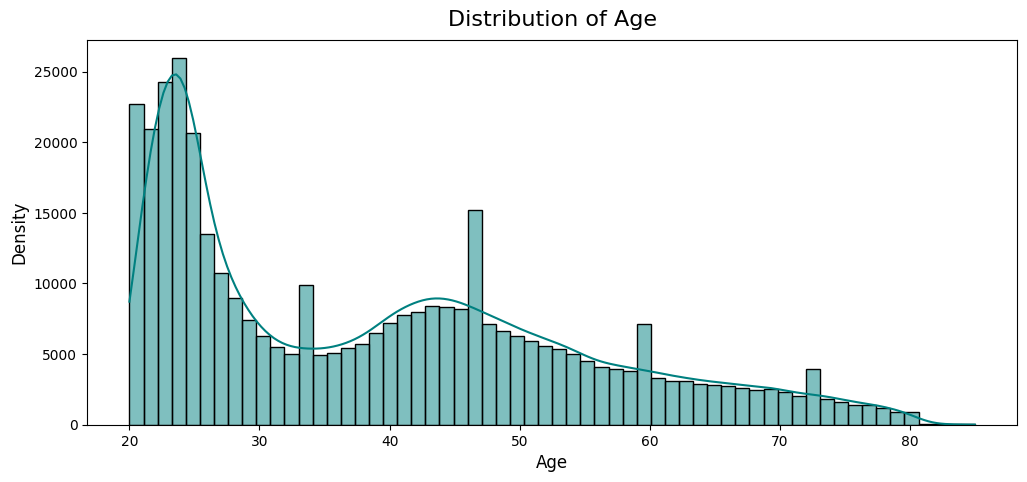

In [ ]:
# Chart - 1 visualization code

#setting the plot size
plt.figure(figsize = (12, 5))

# Creating a histogram of the 'Age' Column using histplot
sns.histplot(Insurance_df['Age'], bins=60,color = ('#008080'),kde=True)

# Adding labels to the x-axis and y-axis
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Density', fontsize = 12)

# Adding a title to the plot
plt.title('Distribution of Age', fontsize = 16, pad = 10)

# Display the plot
plt.show()

#### Chart - 2

### **Age Group Proportion**

In [ ]:
#Creating feature 'Age_group" from Age
Insurance_df['Age_Group']=Insurance_df['Age'].apply(lambda x:'Young Age' if x>=20 and x<=45 else 'Middle Age' if x>45 and x<=60 else 'Old Age')
Insurance_df.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1           28                   0   
1   2    Male   76                1            3                   0   
2   3    Male   47                1           28                   0   
3   4    Male   21                1           11                   1   
4   5  Female   29                1           41                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                    26      217   
1    1-2 Year             No         33536.0                    26      183   
2   > 2 Years            Yes         38294.0                    26       27   
3    < 1 Year             No         28619.0                   152      203   
4    < 1 Year             No         27496.0                   152       39   

   Response Driving_License_category Response_category  \
0         1                      Yes               Yes   
1         0                      Yes                No   
2         1                      Yes               Yes   
3         0                      Yes                No   
4         0                      Yes                No   

  Previously_Insured_category   Age_Group  
0                          No   Young Age  
1                          No     Old Age  
2                          No  Middle Age  
3                         Yes   Young Age  
4                         Yes   Young Age

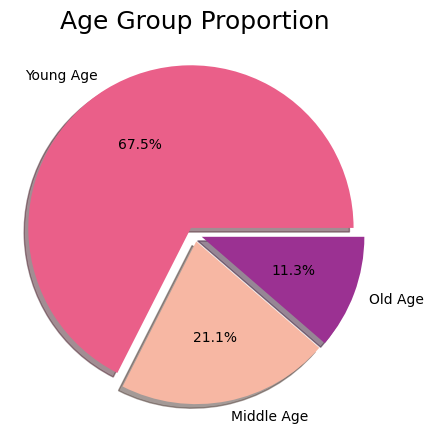

In [ ]:

#Finding each age group count in the dataset
age_group_count=Insurance_df['Age_Group'].value_counts()

#Creating pieplot for room types with explode and custom colors
explode_range = [0.05, 0.05, 0.05]
my_colors=['#EA5F89','#F7B7A3','#9B3192']
plt.pie(age_group_count.values,labels=age_group_count.index,explode=explode_range,autopct='%1.1f%%',shadow=True,colors=my_colors,radius=1.1)

#Addding the title to plot
plt.title('Age Group Proportion',fontsize=18,pad=15)

#Show plot
plt.show()

### **Count of people per each Age Group**

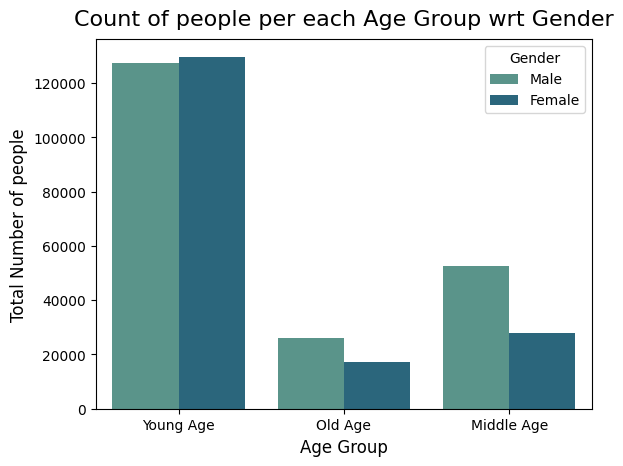

In [ ]:
#Creating countplot to get total count per each Age_Group and adding Gender as hue
sns.countplot(data=Insurance_df,x='Age_Group',hue='Gender',palette='crest')

# Adding labels to the x-axis and y-axis
plt.xlabel('Age Group', fontsize = 12)
plt.ylabel('Total Number of people', fontsize = 12)

# Adding a title to the plot
plt.title('Count of people per each Age Group wrt Gender', fontsize = 16, pad = 10)

# Display the plot
plt.show()

#### Chart - 3

### **Driving License Status Count**

In [ ]:
#Getting Count per each category of driving license status

dl_count=Insurance_df['Driving_License_category'].value_counts().reset_index(name='Count')
dl_count

Driving_License_category   Count
0                      Yes  380297
1                       No     812

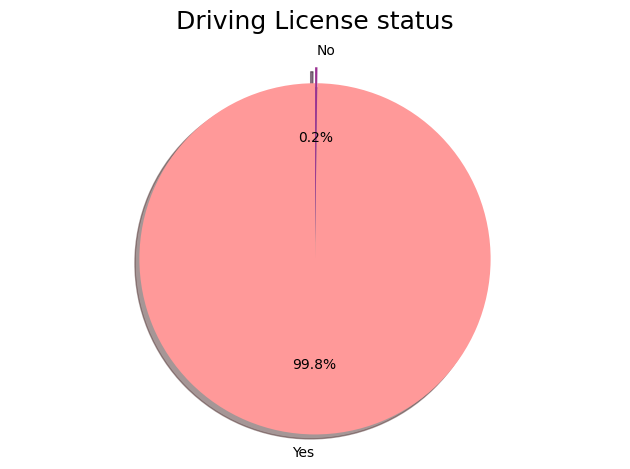

In [ ]:
# Chart - 3 visualization code

fig1, ax = plt.subplots()

#Creating pieplot for driving license status with custom colors
explode_range = [0.05, 0.05]
my_colors = ['#ff9999','#9B3192']

ax.pie(dl_count['Count'],labels=dl_count['Driving_License_category'],explode=explode_range,autopct='%1.1f%%',shadow=True,colors=my_colors,radius=1.1,startangle=90)

#Addding the title to plot
plt.title('Driving License status',fontsize=18,pad=15)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')
plt.tight_layout()

#Show plot
plt.show()

### **Driving License Status Count per Gender**

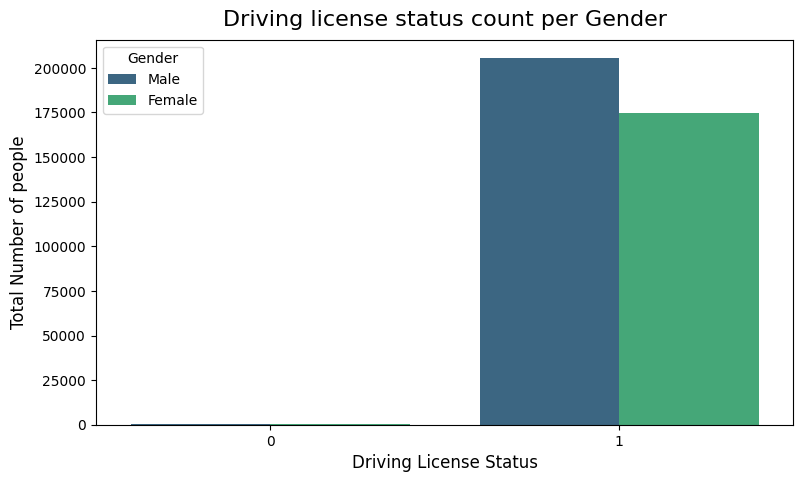

In [ ]:
plt.figure(figsize = (9,5))

#Creating countplot to get total count per driving license status and adding Gender as hue
sns.countplot(data=Insurance_df,x='Driving_License',hue='Gender',palette='viridis')

# Adding labels to the x-axis and y-axis
plt.xlabel('Driving License Status', fontsize = 12)
plt.ylabel('Total Number of people', fontsize = 12)

# Adding a title to the plot
plt.title('Driving license status count per Gender', fontsize = 16, pad = 10)

# Display the plot
plt.show()

#### Chart - 4

### **Driving license status count per Age group**

In [ ]:
dl_yes=Insurance_df.groupby('Age_Group')['Driving_License'].apply(lambda x:(x==1).sum()).reset_index(name='total_count')
dl_yes

Age_Group  total_count
0  Middle Age        80348
1     Old Age        42649
2   Young Age       257300

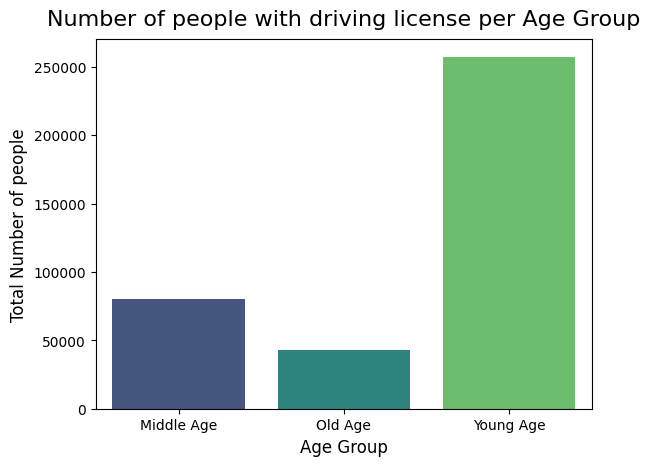

In [ ]:
# Chart - 4 visualization code

#Creating countplot to get total count per each Age_Group and adding Gender as hue
sns.barplot(data=dl_yes,x='Age_Group',y='total_count',palette='viridis')
# Adding labels to the x-axis and y-axis
plt.xlabel('Age Group', fontsize = 12)
plt.ylabel('Total Number of people', fontsize = 12)

# Adding a title to the plot
plt.title('Number of people with driving license per Age Group', fontsize = 16, pad = 10)

# Display the plot
plt.show()

## **Gender**

#### Chart - 5

### **Gender with Driving License Count**

In [ ]:
#Finding count of people who has driving license per Gender
dl_yes=Insurance_df.groupby('Gender')['Driving_License'].apply(lambda x:(x==1).sum()).reset_index(name='dl_count')
dl_yes

Gender  dl_count
0  Female    174808
1    Male    205489

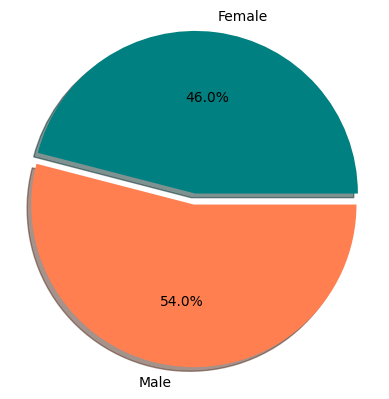

In [ ]:
# Chart - 5 visualization code

#Creating pieplot for room types with explode and custom colors
explode_range = [0.025,0.05]
my_colors=['teal','coral']
plt.pie(dl_yes['dl_count'],labels=dl_yes['Gender'],explode=explode_range,autopct='%1.1f%%',shadow=True,colors=my_colors,radius=1.1)

#Show the plot
plt.show()

## **Region code**

### **Total number of customers per Region**

#### Chart - 6

In [ ]:
#Displaying the count

region_per_count=Insurance_df.groupby('Region_Code')['id'].count().reset_index(name='total_count')
region_per_count.sort_values('total_count',ascending=False,inplace=True)
region_per_count.head()

Region_Code  total_count
28           28       106415
8             8        33877
46           46        19749
41           41        18263
15           15        13308

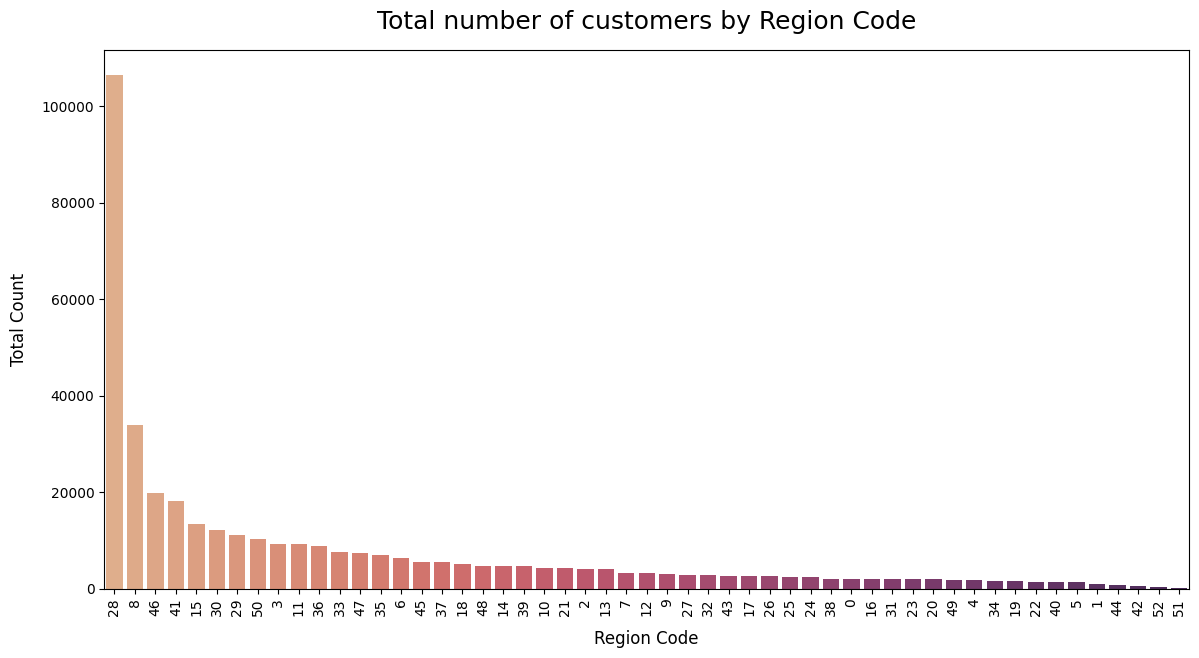

In [ ]:
# Chart - 6 visualization code

#setting the figure size
plt.figure(figsize=(14, 7))

#Creating the count plot
sns.countplot(data=Insurance_df,x='Region_Code',order=Insurance_df['Region_Code'].value_counts().index,palette='flare')

#Adding labels and title to the plot
plt.xlabel('Region Code',fontsize=12,labelpad=10)
plt.ylabel("Total Count", fontsize=12, labelpad=10)
plt.title("Total number of customers per Region",fontsize=18,pad=15)
plt.xticks(rotation=90)

#Show the plot
plt.show()


#### Chart - 7

### **Response count per region code**

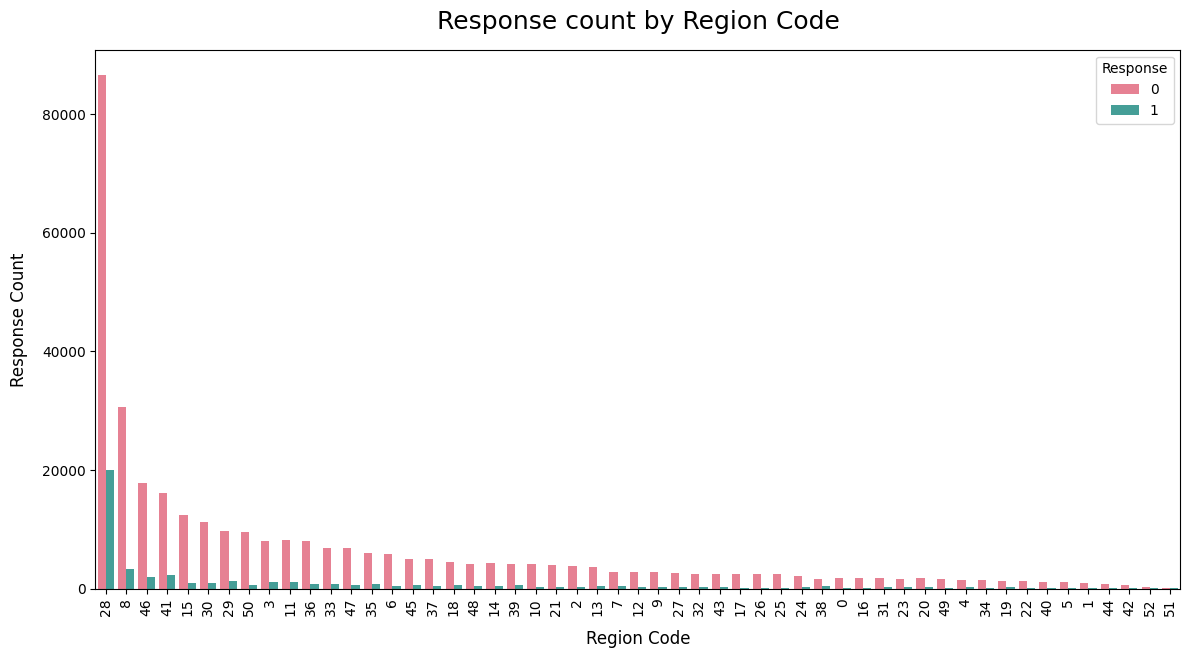

In [ ]:
# Chart - 7 visualization code

plt.figure(figsize=(14, 7))
sns.countplot(data=Insurance_df,x='Region_Code',hue='Response',palette='husl',order=Insurance_df['Region_Code'].value_counts().index)

#Adding labels and title to the plot
plt.xlabel('Region Code',fontsize=12,labelpad=10)
plt.ylabel("Response Count", fontsize=12, labelpad=10)
plt.title("Response count by Region Code",fontsize=18,pad=15)
plt.xticks(rotation=90)

#Show the plot
plt.show()



### **Response(yes) count per region code**

In [ ]:
#Getting only intersted customer count using response yes per each region

response_yes_per_region=Insurance_df.groupby('Region_Code')['Response'].apply(lambda x:(x==1).sum()).reset_index(name='Total Yes Response count')
response_yes_per_region.sort_values('Total Yes Response count',ascending=False,inplace=True)
response_yes_per_region.reset_index()
response_yes_per_region.head()

Region_Code  Total Yes Response count
28           28                     19917
8             8                      3257
41           41                      2224
46           46                      2032
29           29                      1365

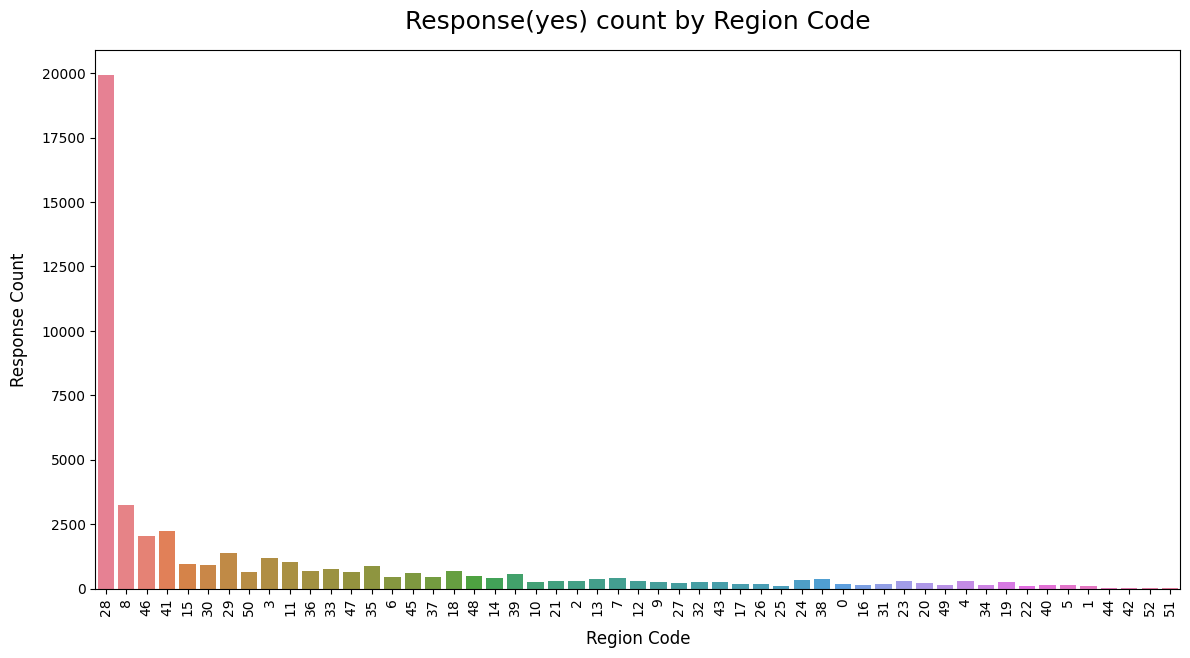

In [ ]:
#creating figure size and using barplot
plt.figure(figsize=(14, 7))
sns.barplot(data=response_yes_per_region,x='Region_Code',y='Total Yes Response count',order=Insurance_df['Region_Code'].value_counts().index,palette='husl')

#Adding labels and title to the plot
plt.xlabel('Region Code',fontsize=12,labelpad=10)
plt.ylabel("Response Count", fontsize=12, labelpad=10)
plt.title("Response(yes) count by Region Code",fontsize=18,pad=15)
plt.xticks(rotation=90)

#Show the plot
plt.show()

## **Damage**

#### Chart - 8

### **Number of vehicles per vehicle age and damage**

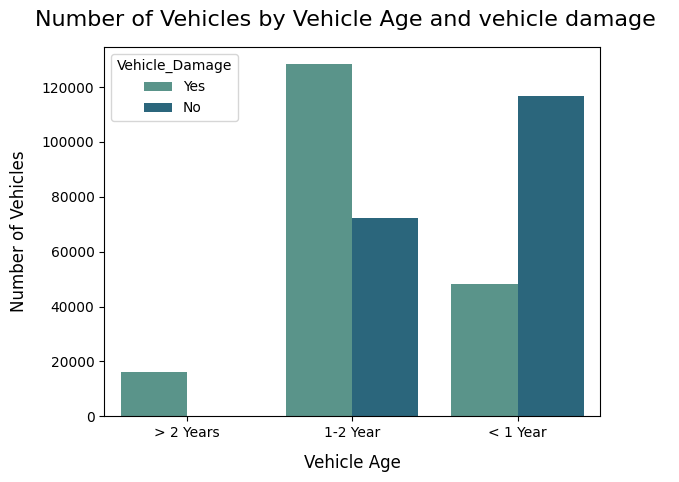

In [ ]:
# Chart - 8 visualization code

#Create a count plot
sns.countplot(data=Insurance_df,x='Vehicle_Age',hue='Vehicle_Damage',palette='crest')

#Adding labels and title to the plot
plt.xlabel('Vehicle Age',fontsize=12,labelpad=10)
plt.ylabel("Number of Vehicles", fontsize=12, labelpad=10)
plt.title("Number of Vehicles by Vehicle Age and vehicle damage  ",fontsize=16,pad=15)

#Show the plot
plt.show()

#### Chart - 9

### **Vehicle count per people Age group and damage**

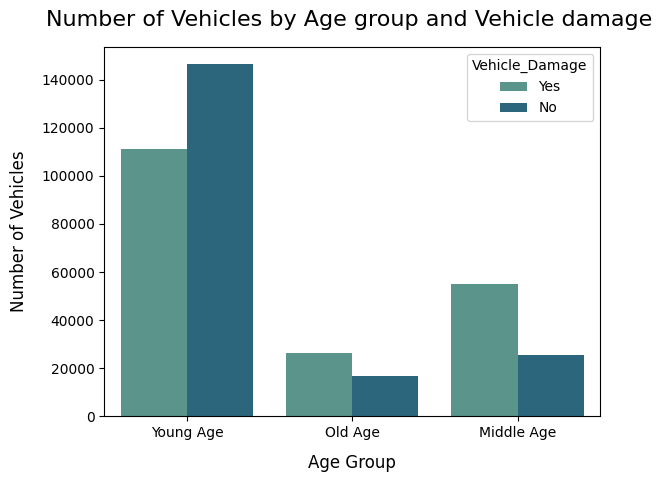

In [ ]:
# Chart - 9 visualization code

#Create a count plot
sns.countplot(data=Insurance_df,x='Age_Group',hue='Vehicle_Damage',palette='crest')

#Adding labels and title to the plot
plt.xlabel('Age Group',fontsize=12,labelpad=10)
plt.ylabel("Number of Vehicles", fontsize=12, labelpad=10)
plt.title("Number of Vehicles by Age group and Vehicle damage ",fontsize=16,pad=15)

#Show the plot
plt.show()

## **Annual Premium**

#### Chart - 10

### **Annual Premium distribution with BoxPlot**

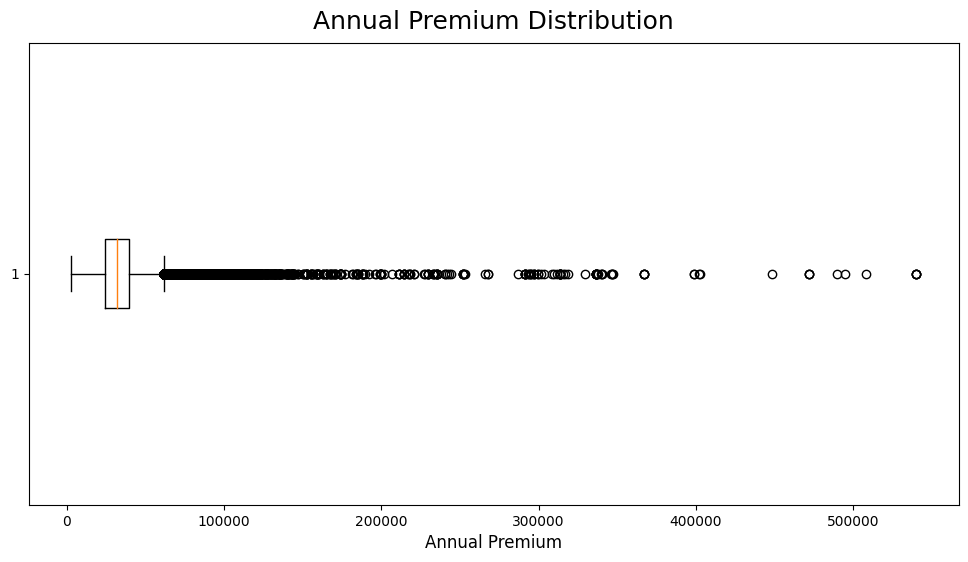

In [ ]:
# Chart - 10 visualization code

# Creating plot and set the figure size
fig, ax = plt.subplots( figsize=(12, 6))

#Plotting boxplot on Annual Premium
ax.boxplot(Insurance_df['Annual_Premium'],vert=False)
ax.set_xlabel('Annual Premium', fontsize=12)
ax.set_title('Annual Premium Distribution', fontsize=18,pad=10)

#Show the plot
plt.show()

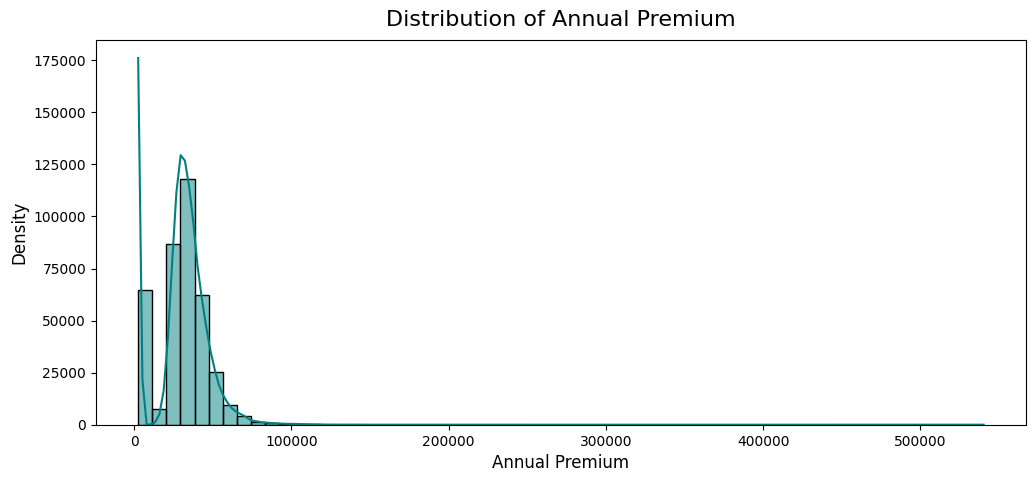

In [ ]:
#Set the figure size
plt.figure(figsize = (12, 5))

# Creating a histogram of the 'Annual Premium' Column using histplot
sns.histplot(Insurance_df['Annual_Premium'], bins=60,color = ('#008080'),kde=True)


# Adding labels to the x-axis and y-axis
plt.xlabel('Annual Premium', fontsize = 12)
plt.ylabel('Density', fontsize = 12)

# Adding a title to the plot
plt.title('Distribution of Annual Premium', fontsize = 16, pad = 10)

# Display the plot
plt.show()

#### Chart - 11

### **Annual Premium per Age group with respect to response**

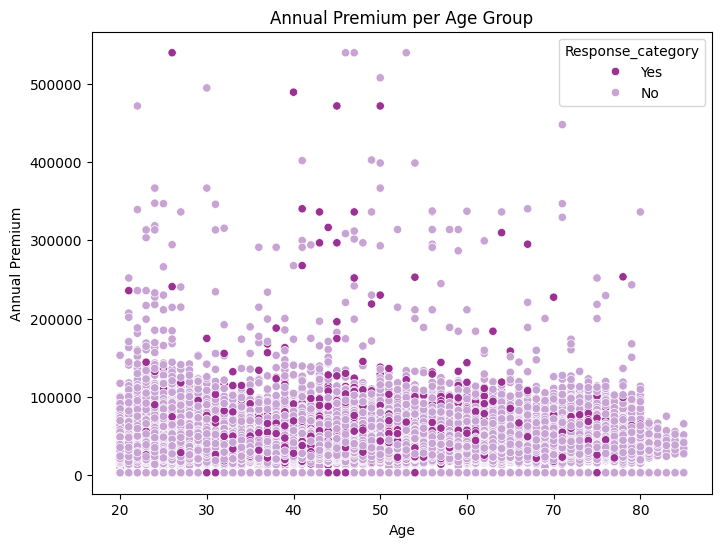

In [ ]:
# Chart - 11 visualization code

# Create a scatter plot using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(y='Annual_Premium', x='Age', data=Insurance_df,hue="Response_category",palette=["#9B3192", "#C8A4D4"])

# Add labels and title to the plot
plt.title('Annual Premium per Age Group')
plt.xlabel('Age')
plt.ylabel('Annual Premium')

# Show the plot
plt.show()

#### Chart - 12

### **Annual Premium per vehicle age and vehicle damage**

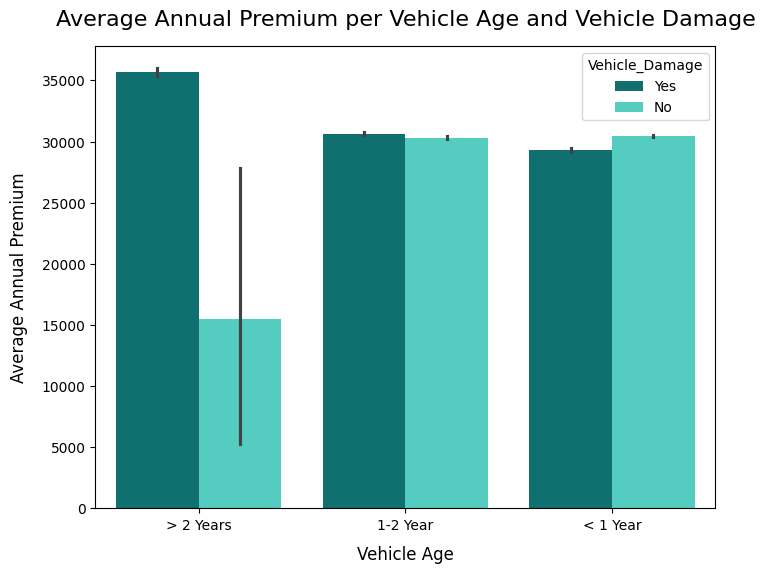

In [ ]:
# Chart - 12 visualization code


#Set the figure size
plt.figure(figsize = (8,6))

#Creating a barplot
sns.barplot(data=Insurance_df,x='Vehicle_Age',y='Annual_Premium',hue='Vehicle_Damage',palette={'Yes':'Teal','No':'Turquoise'})

#Adding labels and title to the plot
plt.xlabel('Vehicle Age',fontsize=12,labelpad=10)
plt.ylabel("Average Annual Premium", fontsize=12, labelpad=10)
plt.title("Average Annual Premium per Vehicle Age and Vehicle Damage",fontsize=16,pad=15)

#Show the plot
plt.show()

## **Response**

#### Chart - 13

### **Previously insured and Response status count**

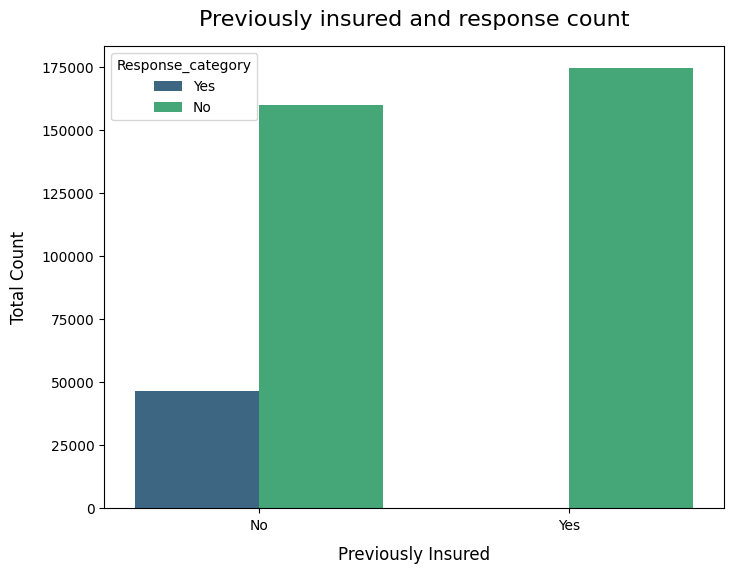

In [ ]:
# Chart - 13 visualization code

#Set the figure size
plt.figure(figsize = (8,6))

#create a count plot
sns.countplot(data=Insurance_df,x='Previously_Insured_category',hue='Response_category',palette='viridis')

#Adding labels and title to the plot
plt.xlabel('Previously Insured',fontsize=12,labelpad=10)
plt.ylabel("Total Count", fontsize=12, labelpad=10)
plt.title("Previously insured and response count",fontsize=16,pad=15)

#Show the plot
plt.show()


In [ ]:
prev_res=Insurance_df.groupby(['Response_category','Previously_Insured_category'])['id'].count().reset_index(name='Count')
prev_res

Response_category Previously_Insured_category   Count
0                No                          No  159929
1                No                         Yes  174470
2               Yes                          No   46552
3               Yes                         Yes     158

In [ ]:
result=prev_res.groupby(['Previously_Insured_category','Response_category'])['Count'].sum().unstack()
result

Response_category                No    Yes
Previously_Insured_category               
No                           159929  46552
Yes                          174470    158

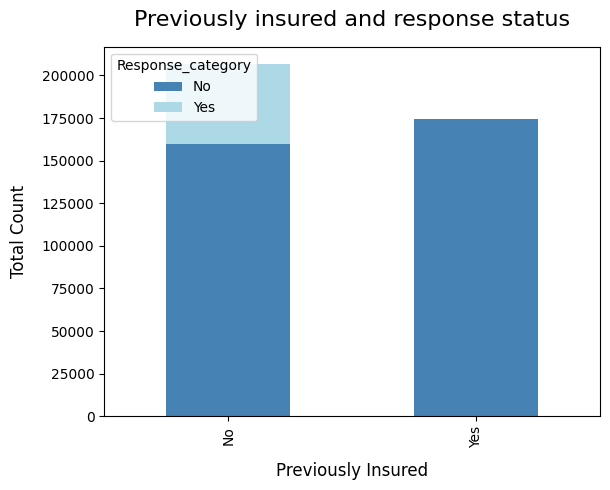

In [ ]:
result.plot(kind='bar', stacked=True,color=['steelblue','lightblue'])

#Adding labels and title to the plot
plt.xlabel('Previously Insured',fontsize=12,labelpad=10)
plt.ylabel("Total Count", fontsize=12, labelpad=10)
plt.title("Previously insured and response status",fontsize=16,pad=15)

#Show the plot
plt.show()

#### Chart - 14

### **Response status by Age group**

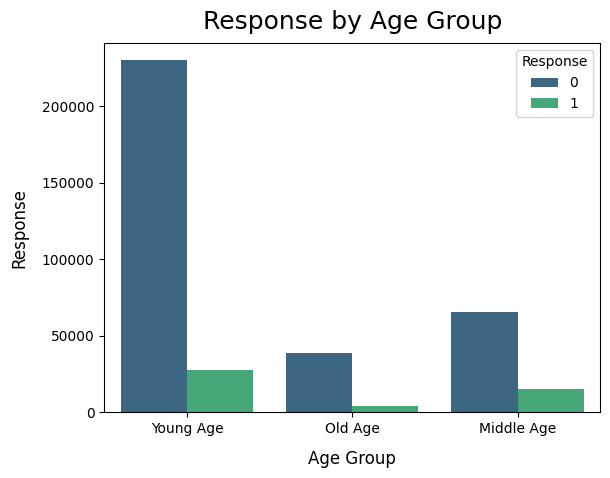

In [ ]:
# Chart - 14 visualization code

#Creating a countplot
sns.countplot(data=Insurance_df,x='Age_Group',hue='Response',palette='viridis')

#Adding labels and title to the plot
plt.xlabel('Age Group',fontsize=12,labelpad=10)
plt.ylabel("Response",fontsize=12,labelpad=10)
plt.title('Response by Age Group',fontsize=18,pad=10)

#Show the plot
plt.show()

#### Chart - 15

### **Response per Gender**

In [ ]:
response_gender=Insurance_df.groupby(['Gender','Response'])['id'].count().reset_index(name='Count')
response_gender

Gender  Response   Count
0  Female         0  156835
1  Female         1   18185
2    Male         0  177564
3    Male         1   28525

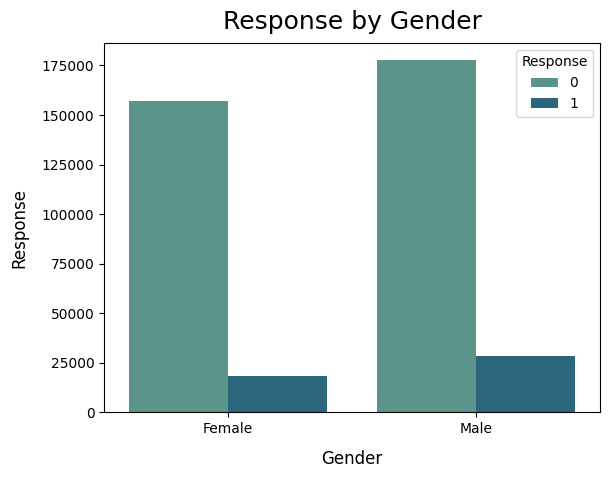

In [ ]:
# Chart - 15 visualization code

#create a bar plot
sns.barplot(data=response_gender,x='Gender',y='Count',hue='Response',palette='crest')

#Adding labels and title to the plot
plt.xlabel('Gender',fontsize=12,labelpad=10)
plt.ylabel("Response",fontsize=12,labelpad=10)
plt.title('Response by Gender',fontsize=18,pad=10)

#Show the plot
plt.show()

## **Policy Sales Channel**

#### Chart - 16

### **Total count per Policy Sales channel(only Response(yes))**


In [ ]:
# Chart - 15 visualization code

policy_count=Insurance_df[Insurance_df['Response']==1].groupby('Policy_Sales_Channel')['Response'].value_counts().reset_index(name='Count')
policy_count.sort_values(by='Count',ascending=False,inplace=True)
policy_count

Policy_Sales_Channel  Response  Count
23                     26         1  15891
92                    124         1  13996
111                   152         1   3858
115                   156         1   2297
116                   157         1   1794
..                    ...       ...    ...
73                     97         1      1
74                     98         1      1
40                     48         1      1
82                    110         1      1
60                     73         1      1

[121 rows x 3 columns]

In [ ]:
top=policy_count.sort_values(by='Count',ascending=False).head(20)
top

Policy_Sales_Channel  Response  Count
23                     26         1  15891
92                    124         1  13996
111                   152         1   3858
115                   156         1   2297
116                   157         1   1794
90                    122         1   1720
113                   154         1   1474
120                   163         1    880
119                   160         1    475
114                   155         1    395
22                     25         1    369
10                     13         1    275
46                     55         1    189
4                       7         1    182
28                     31         1    160
2                       3         1    159
27                     30         1    156
117                   158         1    135
9                      12         1    132
93                    125         1    127

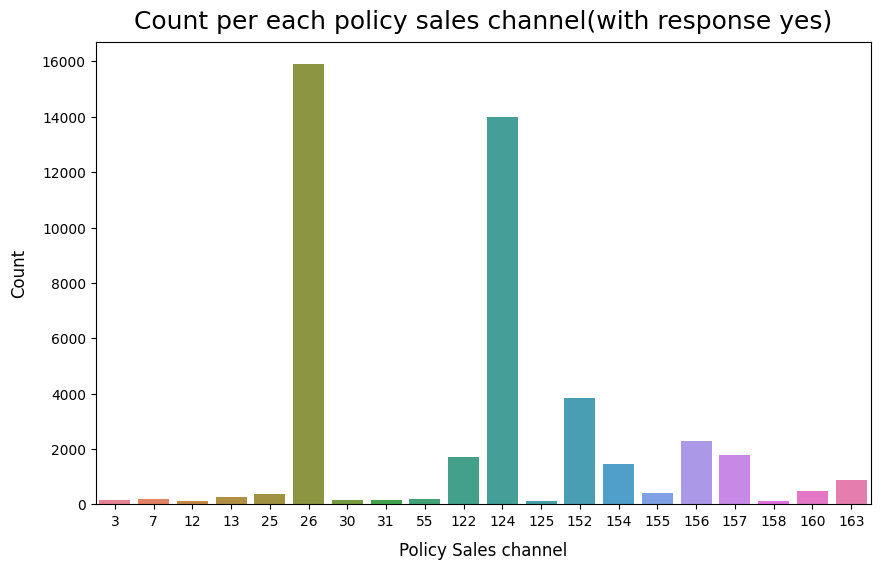

In [ ]:
plt.figure(figsize=(10,6))

#create bar plo
sns.barplot(data=top,x='Policy_Sales_Channel',y='Count',palette='husl')

#Adding labels and title to the plot
plt.xlabel('Policy Sales channel',fontsize=12,labelpad=10)
plt.ylabel("Count",fontsize=12,labelpad=10)
plt.title('Count per each policy sales channel(with response yes)',fontsize=18,pad=10)

#Show the plot
plt.show()

#### Chart - 14 - Correlation Heatmap

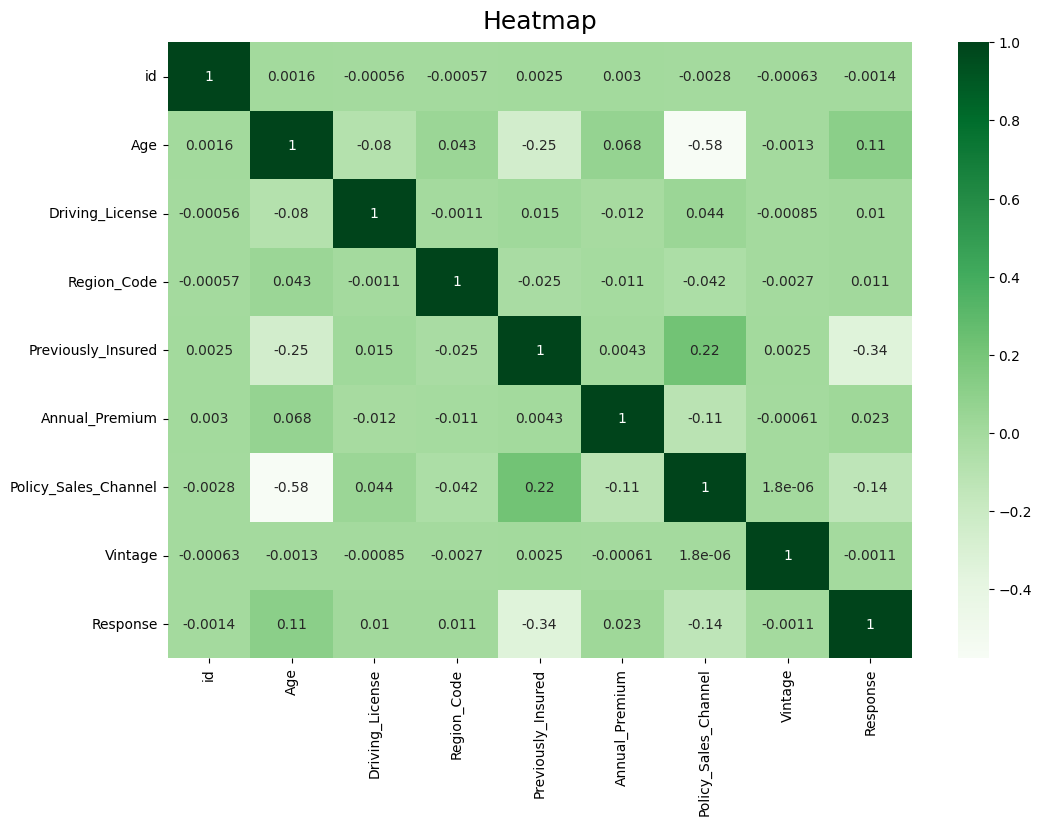

In [ ]:
# Correlation Heatmap visualization code

plt.figure(figsize = (12, 8))


# Select only the numerical columns
numerical_data = Insurance_df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(data=numerical_data.corr(),annot=True,cmap='Greens')

#Adding title to the plot
plt.title('Heatmap',fontsize=18,pad=10)

#Show plot
plt.show()

#### Chart - 15 - Pair Plot

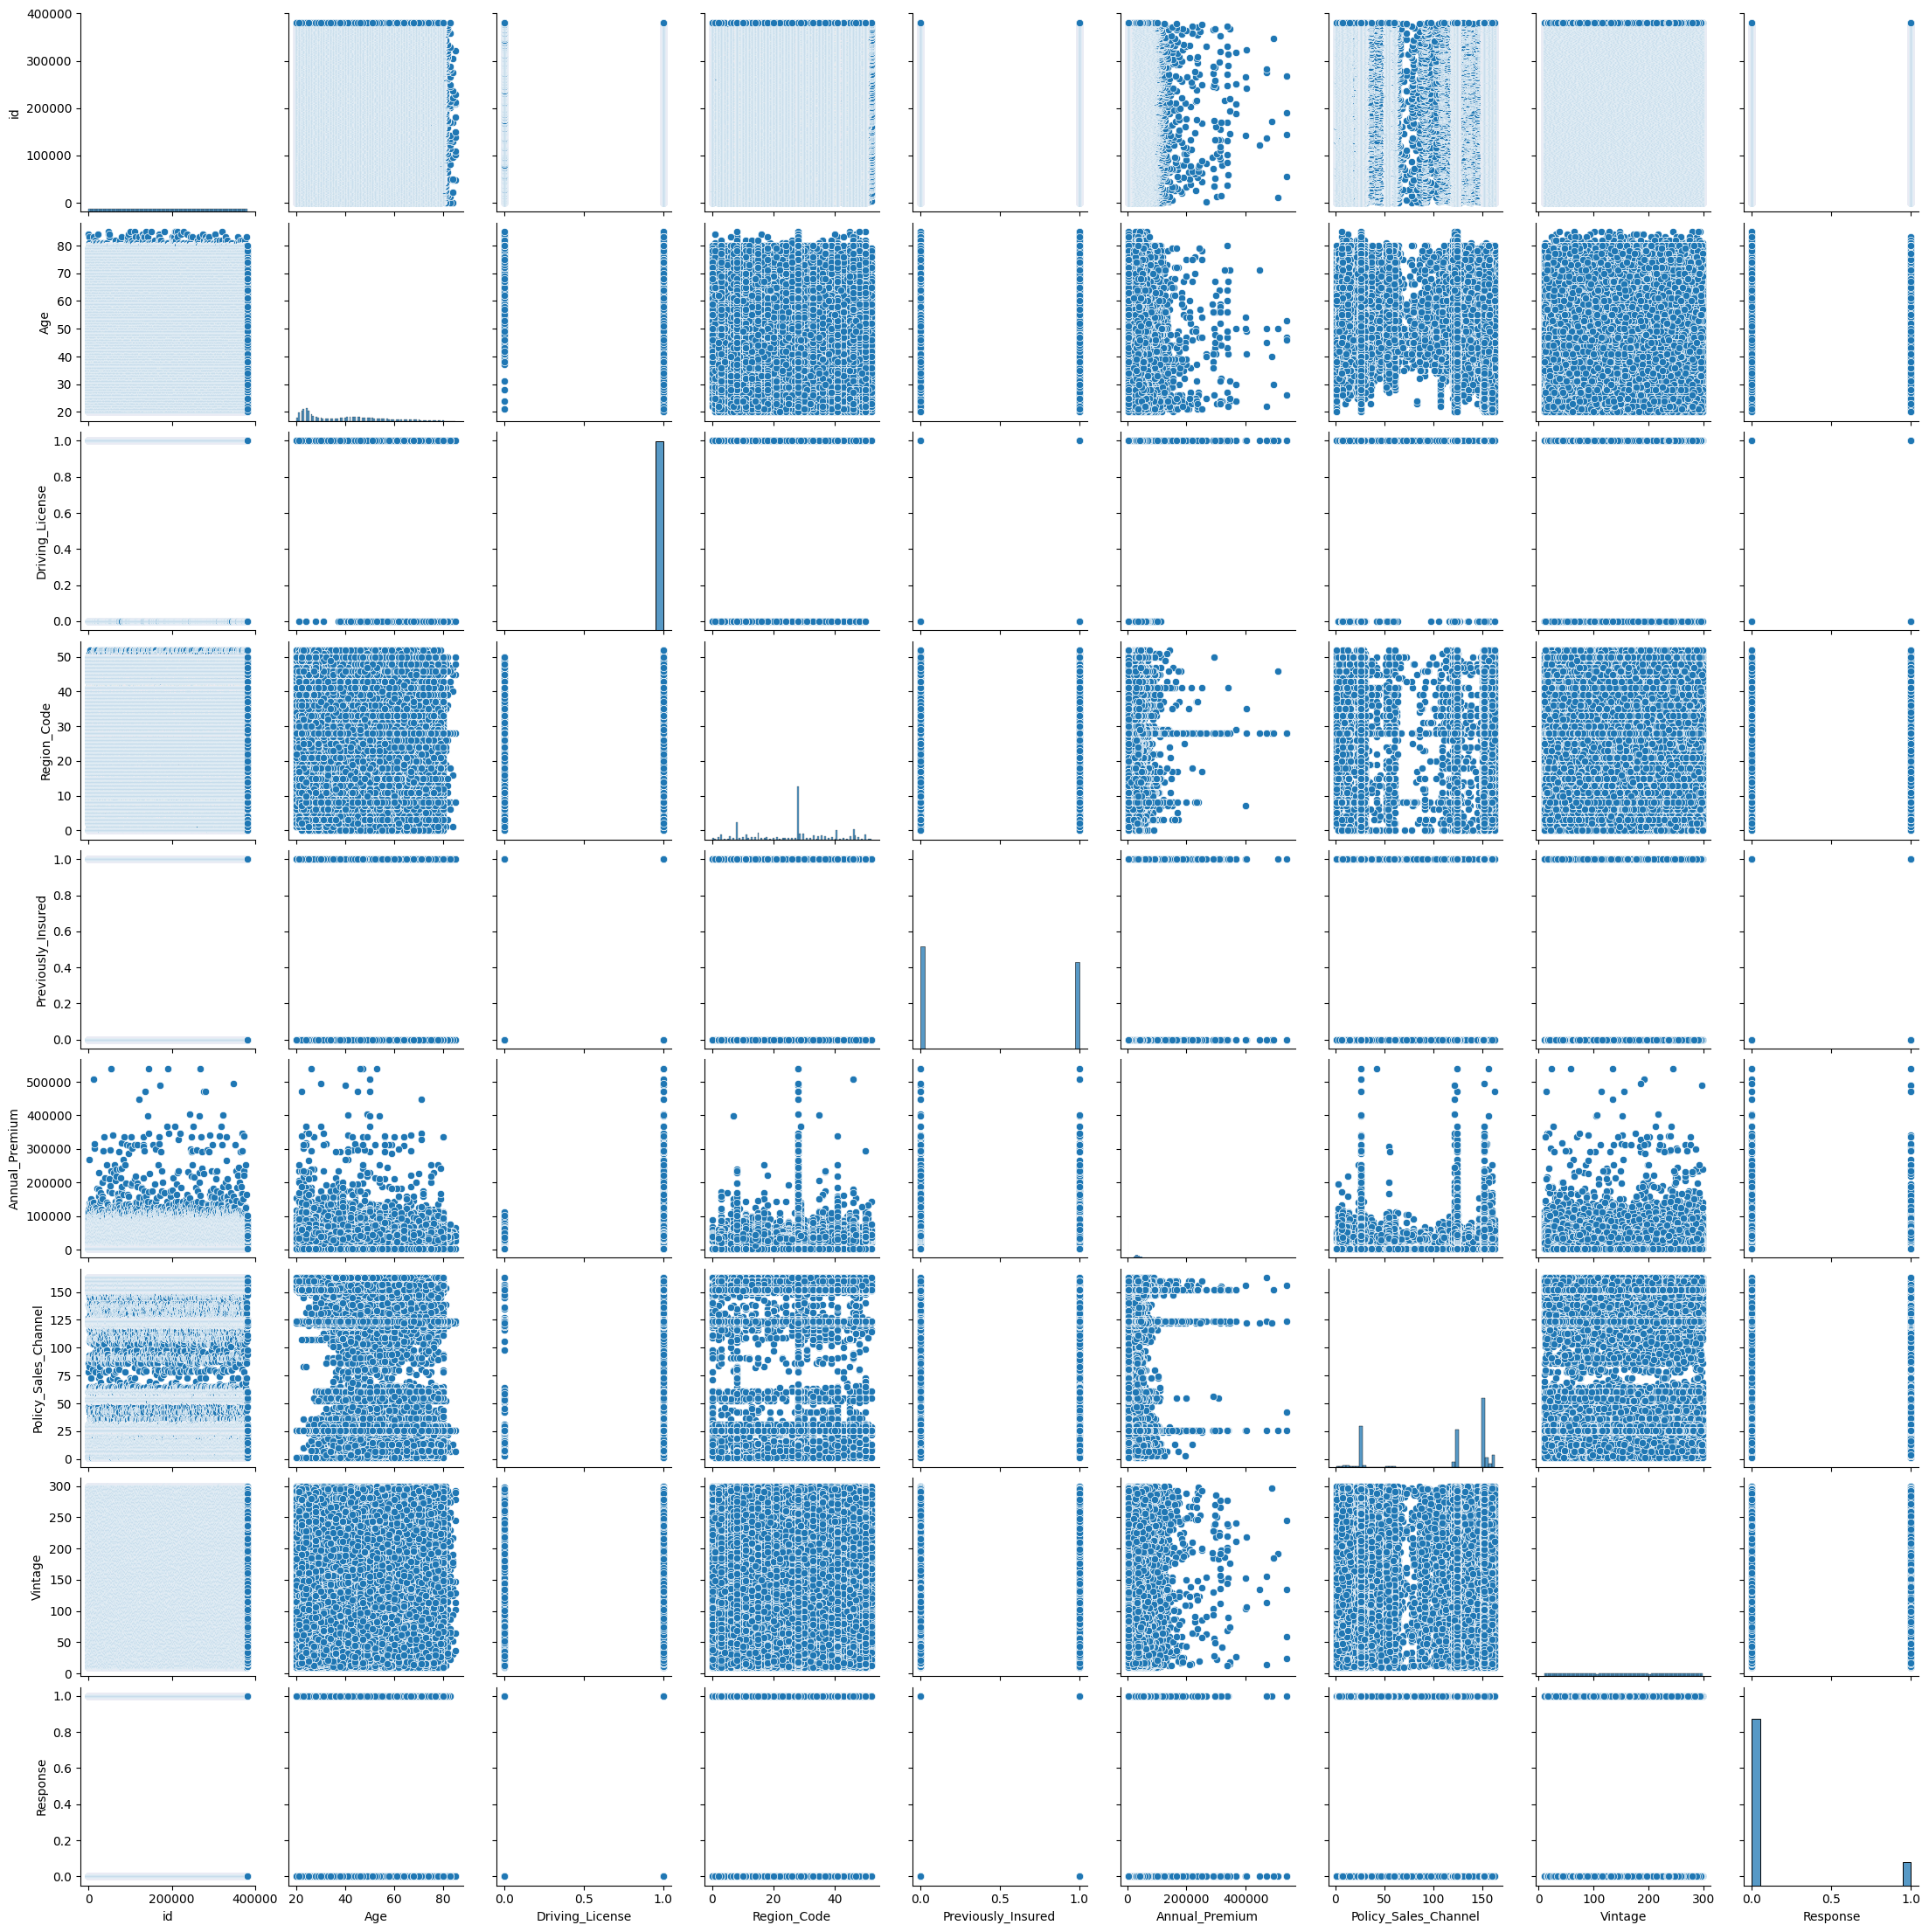

In [ ]:
# Pair Plot visualization code

# Selecting only the numeric columns
numeric_columns =Insurance_df.select_dtypes(include='number')

# Create the pairplot
sns.pairplot(numeric_columns)

plt.show()

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


Null Hypothesis (H0): Probability of young age customers purchasing insurance is same as other age group customers.

Alternative Hypothesis (Ha) : Young age customers are more likely to purchase a policy compared to other groups.

#### 2. Perform an appropriate statistical test.

In [ ]:
data1=Insurance_df.groupby(['Age_Group','Response_category'])['id'].count().unstack()
data1


Response_category      No    Yes
Age_Group                       
Middle Age          65442  15084
Old Age             39050   4189
Young Age          229907  27437

In [ ]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import chi2_contingency

# Perform chi-squared test
chi,p,df,expected=chi2_contingency(data1)
print('P-Value:',p)
print('Degree of freedom:',df)
print('expected values:',expected)
print()
alpha=0.05

if p<alpha:
  print('Reject the null hypothesis')
  print('Hence young age customers are more likely to purchase a policy compared to other groups.')
else:
  print('Fail to reject the null hypothesis')
  print('Hence probability of young age customers purchasing insurance is same as other age group customers.')

P-Value: 0.0
Degree of freedom: 2
expected values: [[ 70656.46278099   9869.53721901]
 [ 37939.48282775   5299.51717225]
 [225803.05439126  31540.94560874]]

Reject the null hypothesis
Hence young age customers are more likely to purchase a policy compared to other groups.


or

In [ ]:
#method 2 using proportion ztest

#Total number of young age group customers
total_young=data1.iloc[2,:].sum()

#total number of other age group customers
total_other=(data1.iloc[0:2,:].sum()).sum()

#Interest count from young age customers
young_yes=data1.iloc[2,1]

#Interest count from other age group customers
other_yes=data1.iloc[0:2,1].sum()

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

count=np.array([young_yes,other_yes])
nobs=np.array([total_young,total_other])
z_stat,p_value=proportions_ztest(count,nobs)
print('P value is:',p_value)

P value is: 0.0


##### Which statistical test have you done to obtain P-Value?

We used chi-squared test to obtain the p-value and compared the p-value with alpha to find evidence for alternative hypothesis.

##### Why did you choose the specific statistical test?

chi-squared test is suitable for comparing the categorical variables across difference groups.Here we have two categorical variables Age Group and response to see if there is any significant difference with response between younger age and other age groups.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Customers with existing policy are not interested in new policy

H0 : There is no significant difference with or without having existing policy

Ha : Customers with existing policy are less likely to show interest in new policy

In [ ]:
data2=Insurance_df.groupby(['Response_category','Previously_Insured_category'])['id'].count().unstack()
data2

Previously_Insured_category      No     Yes
Response_category                          
No                           159929  174470
Yes                           46552     158

In [ ]:
#Total number customers with existing insurance policy
total_prev_yes=data2.iloc[:,1].sum()
print("Total number customers with existing insurance policy",total_prev_yes)

#Total number of customers with no insurance policy
total_prev_no=data2.iloc[:,0].sum()
print("Total number customers with no existing insurance policy",total_prev_no)

Total number customers with existing insurance policy 174628
Total number customers with no existing insurance policy 206481


In [ ]:
#Getting desired values from above table using indexing

#Interest count from customers with existing insurance policy
interest_prev_yes=data2.iloc[1,1]
print("Total number of customers with existing insurance policy who showed interest in new policy:",interest_prev_yes)

#Interest count from customers with no insurance policy
interest_prev_no=data2.iloc[1,0]
print("Total number of customers with no existing insurance policy who showed interest in new policy:",interest_prev_no)

Total number of customers with existing insurance policy who showed interest in new policy: 158
Total number of customers with no existing insurance policy who showed interest in new policy: 46552


#### 2. Perform an appropriate statistical test.

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

count=np.array([interest_prev_yes,interest_prev_no])
nobs=np.array([total_prev_yes,total_prev_no])
z_stat,p_value=proportions_ztest(count,nobs)
print('P value is:',p_value)

print()

alpha=0.05

if p_value<alpha:
  print('Reject null hypothesis')
  print('Hence Customers with existing policy are less likely to show interest in new policy')
else:
  print('Fail to reject the null hypothesis')
  print('Hence There is no significant difference with or without having existing policy')

P value is: 0.0

Reject null hypothesis
Hence Customers with existing policy are less likely to show interest in new policy


##### Which statistical test have you done to obtain P-Value?

Proportion z test is used to obtain P-value and compare with alpha to find evidence to prove Alternate hypothesis.

We rejected the null hypothesis based on analysis

##### Why did you choose the specific statistical test?

The test is particularly well-suited for binary categorical data, where observations fall into one of two categories

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


H0 : Vehicle age donot have any significant impact on showing interest on Vehicle Insurance

Ha : Customers with old age vehicles are more likely to show interest on Vehicle Insurance

In [ ]:
data3=Insurance_df.groupby(['Response_category','Vehicle_Age'])['id'].count().unstack()
data3

Vehicle_Age        1-2 Year  < 1 Year  > 2 Years
Response_category                               
No                   165510    157584      11305
Yes                   34806      7202       4702

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import chi2_contingency
chi,p,df,expected = chi2_contingency(data3)

print('P value is:',p)
print('Degree of fredom:',df)
print('Expected Values:',expected)
print()

alpha=0.05

if p<alpha:
  print('Reject null hypothesis')
  print('Hence customers with old age vehicles are more likely to show interest on Vehicle Insurance')
else:
  print('Fail to reject the null hypothesis')
  print('Hence Vehicle age donot have any significant impact on showing interest on Vehicle Insurance')

P value is: 0.0
Degree of fredom: 2
Expected Values: [[175764.59775025 144589.27397149  14045.12827826]
 [ 24551.40224975  20196.72602851   1961.87172174]]

Reject null hypothesis
Hence customers with old age vehicles are more likely to show interest on Vehicle Insurance


##### Which statistical test have you done to obtain P-Value?

We used chi-squared test to obtain the p-value and compared the p-value with alpha to find evidence for alternative hypothesis.

##### Why did you choose the specific statistical test?

chi-squared test is suitable for comparing the categorical variables across difference groups.Here we have two categorical variables Vehicle Age and response to see if there is any significant difference with response between customers of old aged vehciles and others.

## ***Feature Engineering & Data Pre-processing***

###  Handling Outliers

Identifying Outliers

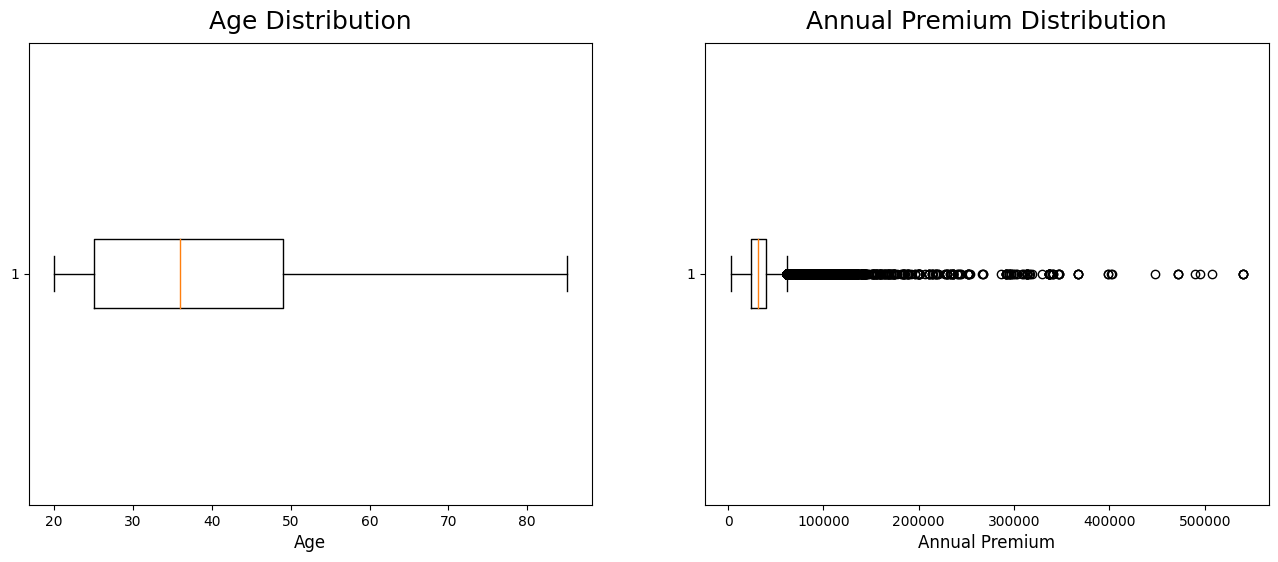

In [ ]:
#Identifying Outliers
# Handling Outliers & Outlier treatments

# Creating subplot with 1 row and 2 columns, and set the figure size
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

#Plotting boxplot on Age on first subplot
axes[0].boxplot(Insurance_df['Age'],vert=False)
axes[0].set_xlabel('Age', fontsize=12)
axes[0].set_title('Age Distribution', fontsize=18,pad=10)


#Plotting boxplot on Annual Premium on second subplot
axes[1].boxplot(Insurance_df['Annual_Premium'],vert=False)
axes[1].set_xlabel('Annual Premium', fontsize=12)
axes[1].set_title('Annual Premium Distribution', fontsize=18,pad=10)

plt.show()

We tried checking numerical columns to identify outlier presence.
Using boxplot we plot Age and Annual Premium.
No outliers found with 'Age' column.
However,Outliers detected with Annual Premium, handling the outliers below

**Handling Outliers**
Method1 : IQR Outlier Removal

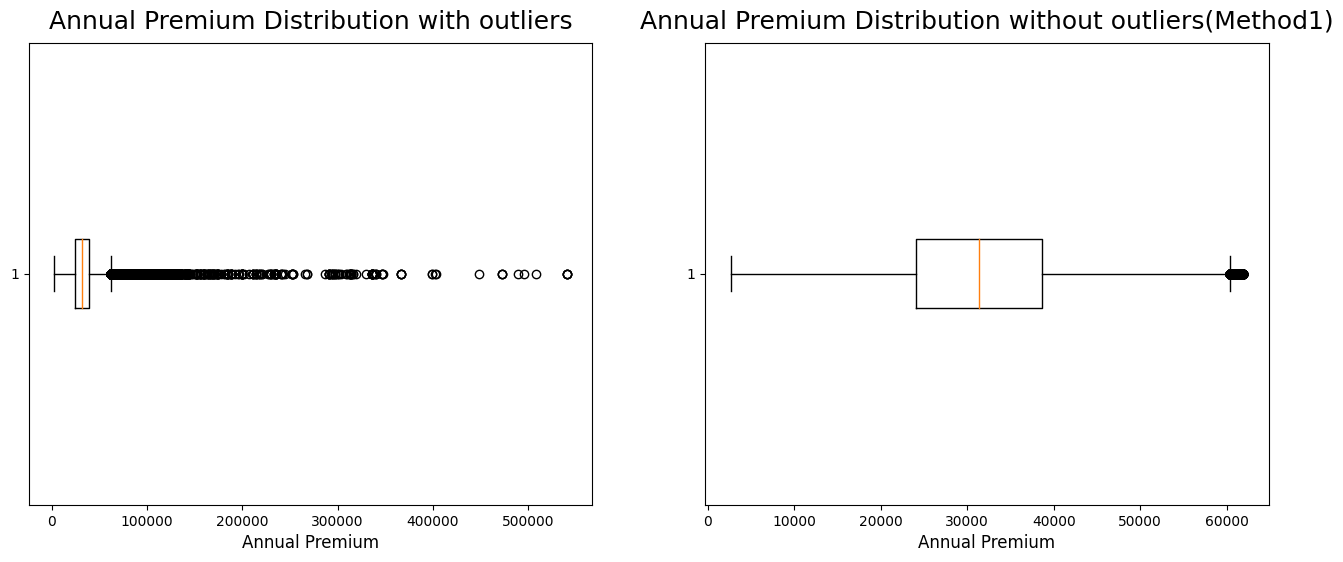

In [ ]:
# Calculate the first and third quartiles, and the interquartile range
Q1 = Insurance_df['Annual_Premium'].quantile(0.25)
Q3 = Insurance_df['Annual_Premium'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for identifying outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Filter the data to remove outliers based on the price
AnnualPremium_no_outliers1= Insurance_df[(Insurance_df['Annual_Premium'] >= lower_bound) & (Insurance_df['Annual_Premium'] <= upper_bound)]

#Plotting boxplot after removing outliers

# Creating subplot with 1 row and 2 columns, and set the figure size
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

#Plotting boxplot on Annual Premium with outliers on first subplot
axes[0].boxplot(Insurance_df['Annual_Premium'],vert=False)
axes[0].set_xlabel('Annual Premium', fontsize=12)
axes[0].set_title('Annual Premium Distribution with outliers', fontsize=18,pad=10)


#Plotting boxplot on Annual Premium without outliers on second subplot
axes[1].boxplot(AnnualPremium_no_outliers1['Annual_Premium'],vert=False)
axes[1].set_xlabel('Annual Premium', fontsize=12)
axes[1].set_title('Annual Premium Distribution without outliers(Method1)', fontsize=18,pad=10)

plt.show()

Method 2:  Percentile-Based Outlier Removal

In [ ]:
lower_bound_list=[0.05,0.1,0.15,0.2,0.21,0.22,0.23,0.24,0.25,0.3]
upper_bound_list=[0.99,0.98,0.95,0.9,0.85,0.8,0.79,0.77,0.75,0.7]

for i in range(len(lower_bound_list)):
  low_quantile=Insurance_df['Annual_Premium'].quantile(lower_bound_list[i])
  upper_quantile=Insurance_df['Annual_Premium'].quantile(upper_bound_list[i])
  print(f'For lower_bound={lower_bound_list[i]} and upper_bound={upper_bound_list[i]}')
  print(low_quantile)
  print(upper_quantile)

For lower_bound=0.05 and upper_bound=0.99
2630.0
72963.0
For lower_bound=0.1 and upper_bound=0.98
2630.0
65380.83999999997
For lower_bound=0.15 and upper_bound=0.95
2630.0
55176.0
For lower_bound=0.2 and upper_bound=0.9
21583.600000000006
48431.0
For lower_bound=0.21 and upper_bound=0.85
22331.0
44547.0
For lower_bound=0.22 and upper_bound=0.8
22940.0
41711.0
For lower_bound=0.23 and upper_bound=0.79
23481.0
41214.0
For lower_bound=0.24 and upper_bound=0.77
23959.0
40287.0
For lower_bound=0.25 and upper_bound=0.75
24405.0
39400.0
For lower_bound=0.3 and upper_bound=0.7
26238.0
37548.0


In [ ]:
#Based on above calculations picked the best possible lower and upper bound
lower_bound=0.2
upper_bound=0.95

low_quantile=Insurance_df['Annual_Premium'].quantile(lower_bound)
upper_quantile=Insurance_df['Annual_Premium'].quantile(upper_bound)

print(f"Lower quantile is {low_quantile} and Upper quantile is {upper_quantile}")
print()

AnnualPremium_no_outliers2 = Insurance_df[(Insurance_df['Annual_Premium'] >= low_quantile) & (Insurance_df['Annual_Premium'] <= upper_quantile)]
AnnualPremium_no_outliers2


Lower quantile is 21583.600000000006 and Upper quantile is 55176.0



id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1    Male   44                1           28                   0   
1            2    Male   76                1            3                   0   
2            3    Male   47                1           28                   0   
3            4    Male   21                1           11                   1   
4            5  Female   29                1           41                   1   
...        ...     ...  ...              ...          ...                 ...   
381104  381105    Male   74                1           26                   1   
381105  381106    Male   30                1           37                   1   
381106  381107    Male   21                1           30                   1   
381107  381108  Female   68                1           14                   0   
381108  381109    Male   46                1           29                   0   

       Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
0        > 2 Years            Yes         40454.0                    26   
1         1-2 Year             No         33536.0                    26   
2        > 2 Years            Yes         38294.0                    26   
3         < 1 Year             No         28619.0                   152   
4         < 1 Year             No         27496.0                   152   
...            ...            ...             ...                   ...   
381104    1-2 Year             No         30170.0                    26   
381105    < 1 Year             No         40016.0                   152   
381106    < 1 Year             No         35118.0                   160   
381107   > 2 Years            Yes         44617.0                   124   
381108    1-2 Year             No         41777.0                    26   

        Vintage  Response Driving_License_category Response_category  \
0           217         1                      Yes               Yes   
1           183         0                      Yes                No   
2            27         1                      Yes               Yes   
3           203         0                      Yes                No   
4            39         0                      Yes                No   
...         ...       ...                      ...               ...   
381104       88         0                      Yes                No   
381105      131         0                      Yes                No   
381106      161         0                      Yes                No   
381107       74         0                      Yes                No   
381108      237         0                      Yes                No   

       Previously_Insured_category   Age_Group  
0                               No   Young Age  
1                               No     Old Age  
2                               No  Middle Age  
3                              Yes   Young Age  
4                              Yes   Young Age  
...                            ...         ...  
381104                         Yes     Old Age  
381105                         Yes   Young Age  
381106                         Yes   Young Age  
381107                          No     Old Age  
381108                          No  Middle Age  

[285834 rows x 16 columns]

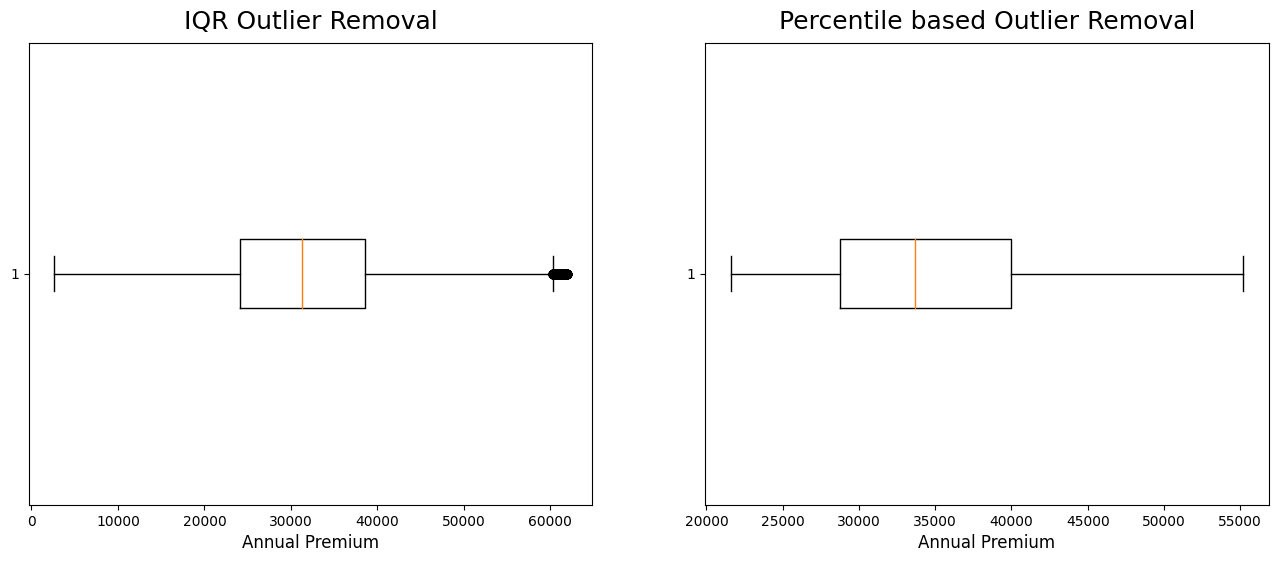

In [ ]:
# Creating subplot with 1 row and 2 columns, and set the figure size
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

#Plotting boxplot on Annual Premium using Method1(IQR outlier removal) on first subplot
axes[0].boxplot(AnnualPremium_no_outliers1['Annual_Premium'],vert=False)
axes[0].set_xlabel('Annual Premium', fontsize=12)
axes[0].set_title('IQR Outlier Removal', fontsize=18,pad=10)

#Plotting boxplot on Annual Premium using Method1(Percentile based outlier removal) on second subplot
axes[1].boxplot(AnnualPremium_no_outliers2['Annual_Premium'],vert=False)
axes[1].set_xlabel('Annual Premium', fontsize=12)
axes[1].set_title('Percentile based Outlier Removal', fontsize=18,pad=10)

plt.show()

To detect outliers from the data, used boxplot on numerical features i.e., Age and Annual Premium.
Detected outliers in feature 'Annual Premium' hence tried two methods for outlier removal
Method1 - IQR Outlier Removal : Removing the data points outside InterQuartileRange.
Method2- Percentile based outlier removal : Tried different lower bound and upper bound , and removed outliers with best possible lower bound=0.2 and upper bound=0.95


In [ ]:
#Dataset after outlier removal
Insurance_df=AnnualPremium_no_outliers2
Insurance_df

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1    Male   44                1           28                   0   
1            2    Male   76                1            3                   0   
2            3    Male   47                1           28                   0   
3            4    Male   21                1           11                   1   
4            5  Female   29                1           41                   1   
...        ...     ...  ...              ...          ...                 ...   
381104  381105    Male   74                1           26                   1   
381105  381106    Male   30                1           37                   1   
381106  381107    Male   21                1           30                   1   
381107  381108  Female   68                1           14                   0   
381108  381109    Male   46                1           29                   0   

       Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
0        > 2 Years            Yes         40454.0                    26   
1         1-2 Year             No         33536.0                    26   
2        > 2 Years            Yes         38294.0                    26   
3         < 1 Year             No         28619.0                   152   
4         < 1 Year             No         27496.0                   152   
...            ...            ...             ...                   ...   
381104    1-2 Year             No         30170.0                    26   
381105    < 1 Year             No         40016.0                   152   
381106    < 1 Year             No         35118.0                   160   
381107   > 2 Years            Yes         44617.0                   124   
381108    1-2 Year             No         41777.0                    26   

        Vintage  Response Driving_License_category Response_category  \
0           217         1                      Yes               Yes   
1           183         0                      Yes                No   
2            27         1                      Yes               Yes   
3           203         0                      Yes                No   
4            39         0                      Yes                No   
...         ...       ...                      ...               ...   
381104       88         0                      Yes                No   
381105      131         0                      Yes                No   
381106      161         0                      Yes                No   
381107       74         0                      Yes                No   
381108      237         0                      Yes                No   

       Previously_Insured_category   Age_Group  
0                               No   Young Age  
1                               No     Old Age  
2                               No  Middle Age  
3                              Yes   Young Age  
4                              Yes   Young Age  
...                            ...         ...  
381104                         Yes     Old Age  
381105                         Yes   Young Age  
381106                         Yes   Young Age  
381107                          No     Old Age  
381108                          No  Middle Age  

[285834 rows x 16 columns]

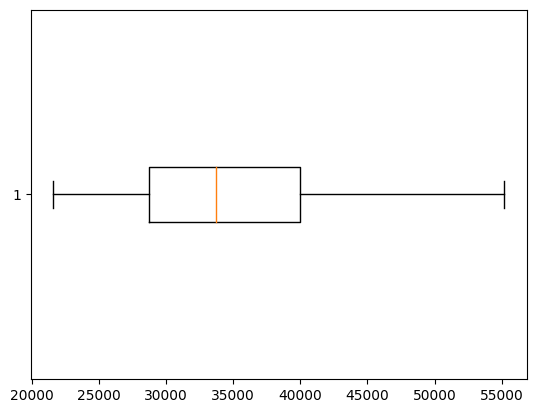

In [ ]:
plt.boxplot(Insurance_df['Annual_Premium'],vert=False)
plt.show()

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

Insurance_df['Gender']=Insurance_df['Gender'].map({'Female':1,'Male':0})
Insurance_df['Vehicle_Damage']=Insurance_df['Vehicle_Damage'].map({'Yes':1,'No':0})
Insurance_df['Vehicle_Age']=Insurance_df['Vehicle_Age'].map({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})
Insurance_df['Age_Group']=Insurance_df['Age_Group'].map({'Young Age':0,'Middle Age':1,'Old Age':2})

#Dropping additional categorical columns I had extracted from already existing numerical columns for visualization
Insurance_df.drop(['Driving_License_category','Response_category','Previously_Insured_category'],axis=1,inplace=True)
Insurance_df.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1       0   44                1           28                   0   
1   2       0   76                1            3                   0   
2   3       0   47                1           28                   0   
3   4       0   21                1           11                   1   
4   5       1   29                1           41                   1   

   Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0            2               1         40454.0                    26      217   
1            1               0         33536.0                    26      183   
2            2               1         38294.0                    26       27   
3            0               0         28619.0                   152      203   
4            0               0         27496.0                   152       39   

   Response  Age_Group  
0         1          0  
1         0          2  
2         1          1  
3         0          0  
4         0          0

We have three existing category columns and one created Age group categorical column, we manually mapped categorical variable to numerical.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features


features = ['Gender',
                  'Age',
                  'Driving_License',
                  'Region_Code',
                  'Previously_Insured',
                  'Vehicle_Age',
                  'Vehicle_Damage',
                  'Annual_Premium',
                  'Policy_Sales_Channel',
                  'Vintage']
correlation_matrix = Insurance_df[features + ['Response']].corr()
print(correlation_matrix)

                        Gender       Age  Driving_License  Region_Code  \
Gender                1.000000 -0.152804         0.018440    -0.001010   
Age                  -0.152804  1.000000        -0.079800     0.043860   
Driving_License       0.018440 -0.079800         1.000000    -0.000316   
Region_Code          -0.001010  0.043860        -0.000316     1.000000   
Previously_Insured    0.088156 -0.272529         0.016554    -0.026258   
Vehicle_Age          -0.167983  0.783523        -0.039082     0.046511   
Vehicle_Damage       -0.097164  0.285685        -0.017767     0.029019   
Annual_Premium       -0.045643  0.194292        -0.015268    -0.020887   
Policy_Sales_Channel  0.119999 -0.603346         0.043195    -0.048811   
Vintage               0.002926 -0.001726        -0.000298    -0.003502   
Response             -0.057622  0.123232         0.009185     0.011126   

                      Previously_Insured  Vehicle_Age  Vehicle_Damage  \
Gender                          0.0881

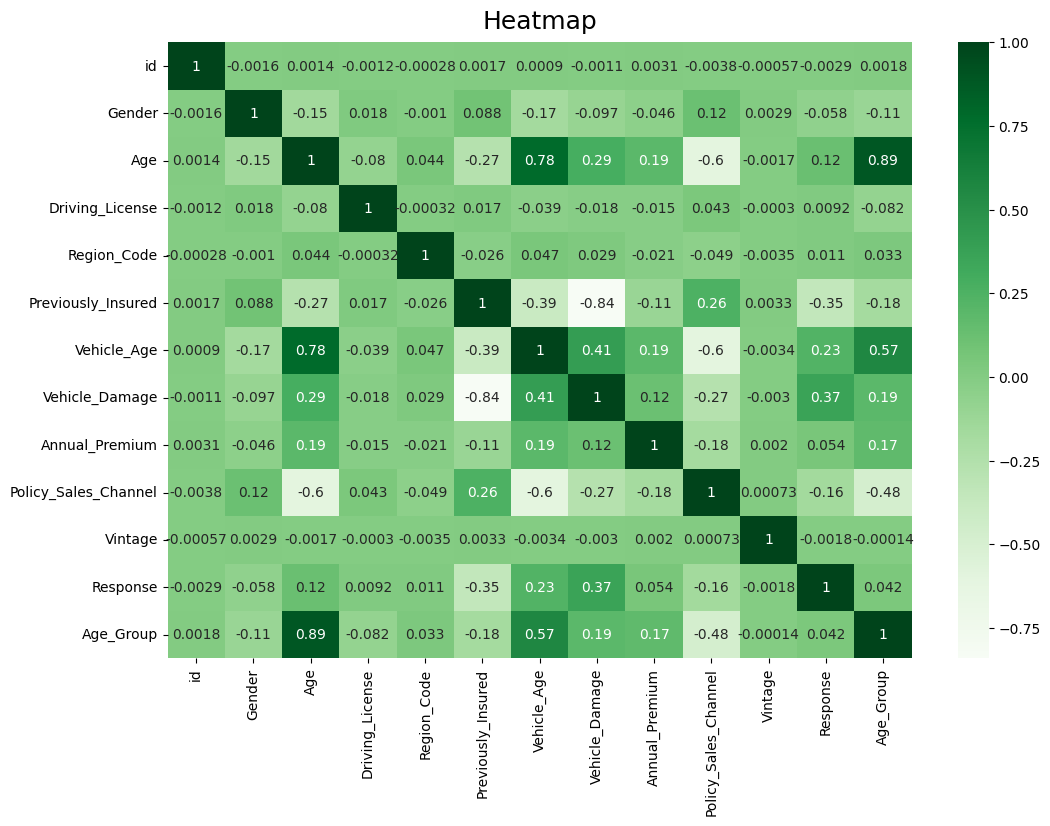

In [ ]:
# Correlation Heatmap visualization code

plt.figure(figsize = (12, 8))

#Creating a heatmap to see coorealtion between them

sns.heatmap(data=Insurance_df.corr(),annot=True,cmap='Greens')

#Adding title to the plot
plt.title('Heatmap',fontsize=18,pad=10)

#Show plot
plt.show()

#### Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

from sklearn.ensemble import RandomForestClassifier

# Fit a random forest model to determine feature importance
X = Insurance_df.drop('Response',axis=1)
y = Insurance_df['Response']

model = RandomForestClassifier()
model.fit(X, y)



RandomForestClassifier()

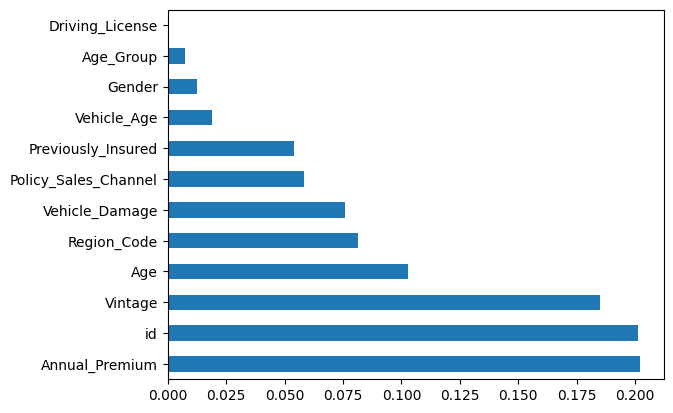

In [ ]:
# Visualize feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False,inplace=True)
importances.plot(kind='barh')
plt.show()

We used implicit feature selection where we use the attribute called ' feature_importances_ which is associated with tree based model.
The tree based model assigns importance score to the features based on how frequently they are used in making a decision for tree.

Driving License,Age Group and Gender are the least important feature as per the result.
Theortically also, insurance is applicable only for license holders and also insurance premium doesnot affect with gender.
Also ID doesnot play any role other that it being unique id per each customer.Hence we can remove feature 'ID'

### Data Transformation

In [ ]:
# Transform Your data
Insurance_df.drop(['Driving_License','Gender','id','Age_Group'],axis=1,inplace=True)
Insurance_df.head()

Age  Region_Code  Previously_Insured  Vehicle_Age  Vehicle_Damage  \
0   44           28                   0            2               1   
1   76            3                   0            1               0   
2   47           28                   0            2               1   
3   21           11                   1            0               0   
4   29           41                   1            0               0   

   Annual_Premium  Policy_Sales_Channel  Vintage  Response  
0         40454.0                    26      217         1  
1         33536.0                    26      183         0  
2         38294.0                    26       27         1  
3         28619.0                   152      203         0  
4         27496.0                   152       39         0

Based on above feature importance result Driving License ,Age Group, id and Gender are the least important features,hence dropping the least important features from dataset.

### Data Scaling

In [ ]:
# Scaling your data

minmax=MinMaxScaler()

Insurance_df[['Age','Vintage']]=minmax.fit_transform(Insurance_df[['Age','Vintage']])

robust=RobustScaler()

Insurance_df[['Annual_Premium']]=robust.fit_transform(Insurance_df[['Annual_Premium']])

Insurance_df

Age  Region_Code  Previously_Insured  Vehicle_Age  \
0       0.369231           28                   0            2   
1       0.861538            3                   0            1   
2       0.415385           28                   0            2   
3       0.015385           11                   1            0   
4       0.138462           41                   1            0   
...          ...          ...                 ...          ...   
381104  0.830769           26                   1            1   
381105  0.153846           37                   1            0   
381106  0.015385           30                   1            0   
381107  0.738462           14                   0            2   
381108  0.400000           29                   0            1   

        Vehicle_Damage  Annual_Premium  Policy_Sales_Channel   Vintage  \
0                    1        0.603521                    26  0.716263   
1                    0       -0.014655                    26  0.598616   
2                    1        0.410508                    26  0.058824   
3                    0       -0.454026                   152  0.667820   
4                    0       -0.554374                   152  0.100346   
...                ...             ...                   ...       ...   
381104               0       -0.315432                    26  0.269896   
381105               0        0.564382                   152  0.418685   
381106               0        0.126709                   160  0.522491   
381107               1        0.975516                   124  0.221453   
381108               0        0.721741                    26  0.785467   

        Response  
0              1  
1              0  
2              1  
3              0  
4              0  
...          ...  
381104         0  
381105         0  
381106         0  
381107         0  
381108         0  

[285834 rows x 9 columns]

Features like Previously_Insured , Vehicle_Age , Vehicle_Damage, Response are already classified numerically, hence scaling is not needed.

For feature Annual Premium, we allowed certain outliers as they are valuable.Hence applying Robust Scaling to feature- Annual Premium.

Then applied MinMax Scaling on other useful features - Age, Vintage.

### Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

X = Insurance_df.drop('Response',axis=1)
y = Insurance_df['Response']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)



(228667, 8)
(57167, 8)


We used 80% - 20% ratio for splitting our dataset to train and test data.


### Handling Imbalanced Dataset

In [ ]:
#Understanding class distribution

Insurance_df['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

In [ ]:
# Handling Imbalanced Dataset (If needed)
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

print(X_resampled.shape)
print(y_resampled.shape)
print()
y_resampled.value_counts()

(502946, 8)
(502946,)



Response
1    251473
0    251473
Name: count, dtype: int64

Our dataset is imbalanced, yes in response significantly underrepresented compared to no.SMOTE handles imbalanced data by over sampling the minority class.
